# Introduction to convolutional neural networks and computer vision with tensorflow

In [17]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-10-30 13:30:07--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.207, 172.217.194.207, 172.253.118.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M  21.4MB/s    in 6.0s    

2023-10-30 13:30:13 (17.5 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



In [18]:
import os
for dirpath,dirnames,filenames in os.walk('pizza_steak'):
  print(len(dirpath),len(dirnames),len(filenames))

11 2 0
17 2 0
23 0 750
23 0 750
16 2 0
22 0 250
22 0 250


In [19]:
import pathlib
import numpy as np

data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['pizza', 'steak'], dtype='<U5')

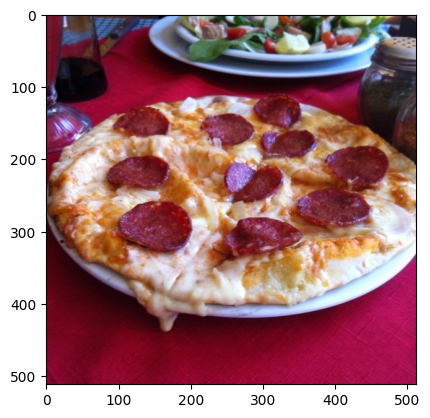

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf

img = mpimg.imread('pizza_steak/train/'+class_names[0]+'/'+os.listdir('pizza_steak/train/pizza')[random.randint(0,200)])
plt.imshow(img)

In [21]:
s = tf.constant(img)
s / 255

<tf.Tensor: shape=(512, 512, 3), dtype=float32, numpy=
array([[[0.45490196, 0.06666667, 0.14901961],
        [0.45882353, 0.07058824, 0.15294118],
        [0.47058824, 0.08235294, 0.16470589],
        ...,
        [0.47843137, 0.4392157 , 0.47058824],
        [0.49803922, 0.45882353, 0.49019608],
        [0.5176471 , 0.47843137, 0.50980395]],

       [[0.45490196, 0.06666667, 0.14901961],
        [0.45882353, 0.07058824, 0.15294118],
        [0.47058824, 0.08235294, 0.16470589],
        ...,
        [0.5058824 , 0.46666667, 0.49803922],
        [0.5019608 , 0.4627451 , 0.49411765],
        [0.4862745 , 0.44705883, 0.47843137]],

       [[0.4509804 , 0.0627451 , 0.14509805],
        [0.45882353, 0.07058824, 0.15294118],
        [0.47058824, 0.08235294, 0.16470589],
        ...,
        [0.49803922, 0.45490196, 0.47843137],
        [0.5019608 , 0.45882353, 0.48235294],
        [0.5019608 , 0.45882353, 0.48235294]],

       ...,

       [[0.5529412 , 0.03921569, 0.19607843],
        [0.54

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


tf.random.set_seed(42)


train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)




model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])


model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_1 = model_1.fit(train_data,epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 9s 149ms/step - loss: 0.5979 - accuracy: 0.6600 - val_loss: 0.4390 - val_accuracy: 0.8020
Epoch 2/5
47/47 [==============================] - 12s 253ms/step - loss: 0.4308 - accuracy: 0.8093 - val_loss: 0.3385 - val_accuracy: 0.8600
Epoch 3/5
47/47 [==============================] - 7s 148ms/step - loss: 0.3896 - accuracy: 0.8200 - val_loss: 0.3265 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 5s 114ms/step - loss: 0.3703 - accuracy: 0.8407 - val_loss: 0.3109 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 5s 114ms/step - loss: 0.3470 - accuracy: 0.8493 - val_loss: 0.2953 - val_accuracy: 0.8800


In [23]:
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_11 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

In [24]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])

model_2.compile(loss= 'binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy']
                )

history_2 = model_2.fit(train_data,epochs=5,
                steps_per_epoch =len(train_data),
                validation_data=valid_data,
                validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 6s 108ms/step - loss: 4.4327 - accuracy: 0.5987 - val_loss: 0.8917 - val_accuracy: 0.5820
Epoch 2/5
47/47 [==============================] - 6s 126ms/step - loss: 0.5464 - accuracy: 0.7387 - val_loss: 0.6917 - val_accuracy: 0.6660
Epoch 3/5
47/47 [==============================] - 5s 116ms/step - loss: 0.5635 - accuracy: 0.7480 - val_loss: 0.4446 - val_accuracy: 0.7840
Epoch 4/5
47/47 [==============================] - 5s 108ms/step - loss: 0.5066 - accuracy: 0.7707 - val_loss: 0.7770 - val_accuracy: 0.7100
Epoch 5/5
47/47 [==============================] - 6s 127ms/step - loss: 0.5059 - accuracy: 0.7700 - val_loss: 0.5833 - val_accuracy: 0.7540


In [25]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 150528)            0         
                                                                 
 dense_7 (Dense)             (None, 100)               15052900  
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
train_data.next()

(array([[[[0.25882354, 0.21568629, 0.13725491],
          [0.31764707, 0.28235295, 0.22352943],
          [0.3254902 , 0.28235295, 0.25882354],
          ...,
          [0.10980393, 0.05882353, 0.08627451],
          [0.10588236, 0.05490196, 0.08235294],
          [0.10196079, 0.05882353, 0.08235294]],
 
         [[0.32941177, 0.29411766, 0.23529413],
          [0.30588236, 0.26666668, 0.21960786],
          [0.30588236, 0.26666668, 0.23137257],
          ...,
          [0.10980393, 0.05882353, 0.08627451],
          [0.1137255 , 0.0627451 , 0.09019608],
          [0.10588236, 0.0627451 , 0.08627451]],
 
         [[0.29411766, 0.25490198, 0.21960786],
          [0.32941177, 0.2901961 , 0.2509804 ],
          [0.30980393, 0.2784314 , 0.23529413],
          ...,
          [0.1137255 , 0.0627451 , 0.09019608],
          [0.10588236, 0.05490196, 0.08235294],
          [0.10980393, 0.06666667, 0.09019608]],
 
         ...,
 
         [[0.03529412, 0.03137255, 0.01568628],
          [0.03529

# Multi-Class Image Classification

In [27]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip','r')
zip_ref.extractall()
zip_ref.close()


--2023-10-30 13:31:49--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.207, 74.125.130.207, 74.125.68.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M  22.4MB/s    in 24s     

2023-10-30 13:32:14 (20.8 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [28]:
import os
for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(len(dirnames),len(filenames),len(dirpath))

2 0 24
10 0 30
0 750 44
0 750 45
0 750 40
0 750 36
0 750 44
0 750 36
0 750 36
0 750 36
0 750 41
0 750 40
10 0 29
0 250 43
0 250 44
0 250 39
0 250 35
0 250 43
0 250 35
0 250 35
0 250 35
0 250 40
0 250 39


In [29]:
train_dir = '10_food_classes_all_data/train'
test_dir = '10_food_classes_all_data/test'


In [30]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
print(data_dir)

class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

10_food_classes_all_data/train


array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf

tf.random.set_seed(42)


train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)


train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               seed=42)



Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [33]:
from keras.src.optimizers import optimizer
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation

model_3 = Sequential([
    Conv2D(10,3,input_shape=(224,224,3)),
    Activation('relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation='softmax')
])

model_3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_cat = model_3.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=valid_data,
                          validation_steps=len(valid_data))

Epoch 1/5
235/235 [==============================] - 35s 139ms/step - loss: 3.0672 - accuracy: 0.1649 - val_loss: 2.1280 - val_accuracy: 0.2404
Epoch 2/5
235/235 [==============================] - 29s 125ms/step - loss: 1.8196 - accuracy: 0.3748 - val_loss: 2.0371 - val_accuracy: 0.2900
Epoch 3/5
235/235 [==============================] - 28s 117ms/step - loss: 1.1212 - accuracy: 0.6507 - val_loss: 2.2588 - val_accuracy: 0.2696
Epoch 4/5
235/235 [==============================] - 28s 120ms/step - loss: 0.4022 - accuracy: 0.8996 - val_loss: 2.8624 - val_accuracy: 0.2732
Epoch 5/5
235/235 [==============================] - 28s 117ms/step - loss: 0.1182 - accuracy: 0.9783 - val_loss: 3.1786 - val_accuracy: 0.2628


In [35]:
tf.random.set_seed(42)


train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=0.15,
                                   shear_range=0.15,
                                   width_shift_range=0.15,
                                   height_shift_range=0.15,
                                   horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1./255)


train_data_aug = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               seed=42)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [36]:
from keras.src.optimizers import optimizer
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation

model_3 = Sequential([
    Conv2D(10,3,input_shape=(224,224,3)),
    Activation('relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation='softmax')
])

model_3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_cat = model_3.fit(train_data_aug,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=valid_data,
                          validation_steps=len(valid_data))

Epoch 1/5
235/235 [==============================] - 110s 452ms/step - loss: 2.2635 - accuracy: 0.1640 - val_loss: 2.0562 - val_accuracy: 0.2608
Epoch 2/5
235/235 [==============================] - 106s 450ms/step - loss: 2.0900 - accuracy: 0.2452 - val_loss: 2.0007 - val_accuracy: 0.2808
Epoch 3/5
235/235 [==============================] - 108s 460ms/step - loss: 2.0506 - accuracy: 0.2651 - val_loss: 1.9826 - val_accuracy: 0.2980
Epoch 4/5
235/235 [==============================] - 108s 461ms/step - loss: 2.0380 - accuracy: 0.2759 - val_loss: 1.9342 - val_accuracy: 0.3108
Epoch 5/5
235/235 [==============================] - 107s 454ms/step - loss: 1.9892 - accuracy: 0.3025 - val_loss: 1.8838 - val_accuracy: 0.3560
